In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

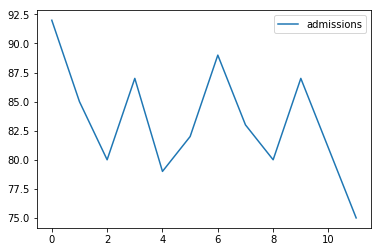

In [5]:
data = pd.read_csv("hospital_admissions.csv")
data.plot()
plt.show()

In [13]:
moving_avg=data.rolling(3).mean()
#moving_avg

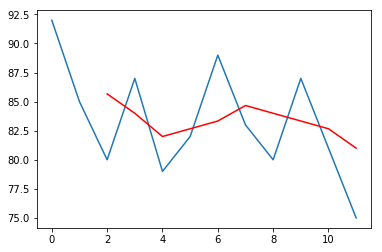

In [7]:
plt.plot(data)
plt.plot(moving_avg, color='red')

In [8]:
ls=[]
for i in range(3,int(len(data)/2) +1):
    moving_avg=data.rolling(i).mean()
    diff = data - moving_avg
    diff.dropna(inplace=True)
    rmse = np.sqrt((diff**2).sum(axis=0)/len(diff))
    ls.append((rmse[0],i))
    

In [9]:
ls

[(3.9200340134578786, 3),
 (3.181980515339464, 4),
 (3.9705163392183622, 5),
 (4.160471584991755, 6)]

In [10]:
best_rmse=min(ls)[0]
best_lag = min(ls)[1]

print('For given data, best-suited lag is ',best_lag, ' with RMSE = ',best_rmse)

For given data, best-suited lag is  4  with RMSE =  3.181980515339464


In [11]:
ideal_moving_avg=data.rolling(best_lag).mean()

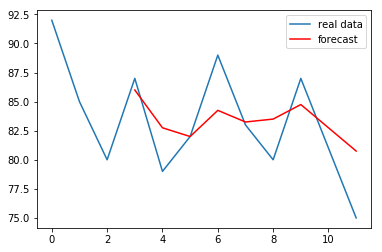

In [12]:
plt.plot(data, label='real data')
plt.plot(ideal_moving_avg,color='red', label='forecast')
plt.legend()